In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sb
from pprint import pprint

covid = pd.read_csv('owid-covid-data.csv')

In [2]:
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99564,ZWE,Africa,Zimbabwe,2021-06-27,46442.0,424.0,666.143,1736.0,11.0,9.143,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
99565,ZWE,Africa,Zimbabwe,2021-06-28,47284.0,842.0,727.000,1749.0,13.0,9.143,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
99566,ZWE,Africa,Zimbabwe,2021-06-29,48533.0,1249.0,831.286,1761.0,12.0,10.000,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
99567,ZWE,Africa,Zimbabwe,2021-06-30,49864.0,1331.0,912.000,1789.0,28.0,13.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


### Deleting unncessary rows, saving as new dataframe each time

In [3]:
covid.drop(covid.loc[:, 'reproduction_rate':'tests_units'].columns, axis = 1, inplace=True)
covid.drop(covid.loc[:, 'median_age':'life_expectancy'].columns, axis = 1, inplace=True)
covid.drop('stringency_index', axis=1, inplace=True)
covid.drop('excess_mortality', axis=1, inplace=True)

In [4]:
pprint(covid.columns.tolist())

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'new_vaccinations_smoothed_per_million',
 'population',
 'population_density',
 'human_development_index']


In [5]:
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,population,population_density,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99564,ZWE,Africa,Zimbabwe,2021-06-27,46442.0,424.0,666.143,1736.0,11.0,9.143,...,518968.0,25751.0,19504.0,8.58,5.09,3.49,1312.0,14862927.0,42.729,0.571
99565,ZWE,Africa,Zimbabwe,2021-06-28,47284.0,842.0,727.000,1749.0,13.0,9.143,...,534906.0,23895.0,22615.0,8.74,5.14,3.60,1522.0,14862927.0,42.729,0.571
99566,ZWE,Africa,Zimbabwe,2021-06-29,48533.0,1249.0,831.286,1761.0,12.0,10.000,...,544888.0,16443.0,24174.0,8.85,5.19,3.67,1626.0,14862927.0,42.729,0.571
99567,ZWE,Africa,Zimbabwe,2021-06-30,49864.0,1331.0,912.000,1789.0,28.0,13.857,...,555277.0,16841.0,23656.0,8.96,5.23,3.74,1592.0,14862927.0,42.729,0.571


#### Deleting all rows that don't have complete data for deaths and vaccinations

In [6]:
ctd = ['Africa','Algeria','Anguilla','Aruba','Bermuda','British Virgin Islands','Cayman Islands','Cook Islands','Curacao','Dominica','Faeroe Islands','Falkland Islands','French Polynesia','Gibraltar','Greenland','Guernsey','International','Isle of Man','Jersey','Kiribati','Macao','Marshall Islands','Micronesia (country)','Montserrat','Nauru','New Caledonia','Nothern Cyprus','Pitcairn','Saint Helena','Saint Kitts and Nevis','Samoa','Sint Maarten (Dutch part)','Soloman Islands','Tonga','Turkmenistan','Turks and Caicos Islands','Tuvalu','Vatican','Wallis and Futuna','Asia','Bonaire Sint Eustatius and Saba', 'Europe', 'European Union', 'Kosovo', 'Monaco','North America','Northern Cyprus','Oceania','San Marino','Somalia','South America','Taiwan']
covid = covid[~covid.location.isin(ctd)]
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,population,population_density,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99564,ZWE,Africa,Zimbabwe,2021-06-27,46442.0,424.0,666.143,1736.0,11.0,9.143,...,518968.0,25751.0,19504.0,8.58,5.09,3.49,1312.0,14862927.0,42.729,0.571
99565,ZWE,Africa,Zimbabwe,2021-06-28,47284.0,842.0,727.000,1749.0,13.0,9.143,...,534906.0,23895.0,22615.0,8.74,5.14,3.60,1522.0,14862927.0,42.729,0.571
99566,ZWE,Africa,Zimbabwe,2021-06-29,48533.0,1249.0,831.286,1761.0,12.0,10.000,...,544888.0,16443.0,24174.0,8.85,5.19,3.67,1626.0,14862927.0,42.729,0.571
99567,ZWE,Africa,Zimbabwe,2021-06-30,49864.0,1331.0,912.000,1789.0,28.0,13.857,...,555277.0,16841.0,23656.0,8.96,5.23,3.74,1592.0,14862927.0,42.729,0.571


In [7]:
covid['human_development_index'].round(decimals=2)

0        0.51
1        0.51
2        0.51
3        0.51
4        0.51
         ... 
99564    0.57
99565    0.57
99566    0.57
99567    0.57
99568    0.57
Name: human_development_index, Length: 87342, dtype: float64

In [8]:
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,population,population_density,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99564,ZWE,Africa,Zimbabwe,2021-06-27,46442.0,424.0,666.143,1736.0,11.0,9.143,...,518968.0,25751.0,19504.0,8.58,5.09,3.49,1312.0,14862927.0,42.729,0.571
99565,ZWE,Africa,Zimbabwe,2021-06-28,47284.0,842.0,727.000,1749.0,13.0,9.143,...,534906.0,23895.0,22615.0,8.74,5.14,3.60,1522.0,14862927.0,42.729,0.571
99566,ZWE,Africa,Zimbabwe,2021-06-29,48533.0,1249.0,831.286,1761.0,12.0,10.000,...,544888.0,16443.0,24174.0,8.85,5.19,3.67,1626.0,14862927.0,42.729,0.571
99567,ZWE,Africa,Zimbabwe,2021-06-30,49864.0,1331.0,912.000,1789.0,28.0,13.857,...,555277.0,16841.0,23656.0,8.96,5.23,3.74,1592.0,14862927.0,42.729,0.571


In [9]:
covid.to_csv('finaldata.csv')

In [42]:
covid['vaxrate'] = covid['people_vaccinated']/covid['population']

<ipython-input-42-830e38548d7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['vaxrate'] = covid['people_vaccinated']/covid['population']


In [43]:
covid['vaxrate_diff'] = covid['vaxrate'].diff()

<ipython-input-43-fdf2f27add42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['vaxrate_diff'] = covid['vaxrate'].diff()


In [51]:
lowhdi = covid['human_development_index'] < 0.5
covid[lowhdi]
covid[lowhdi].location.unique()

array(['Burkina Faso', 'Burundi', 'Central African Republic', 'Chad',
       'Democratic Republic of Congo', 'Eritrea', 'Ethiopia', 'Gambia',
       'Guinea', 'Guinea-Bissau', 'Liberia', 'Malawi', 'Mali',
       'Mozambique', 'Niger', 'Sierra Leone', 'South Sudan', 'Yemen'],
      dtype=object)

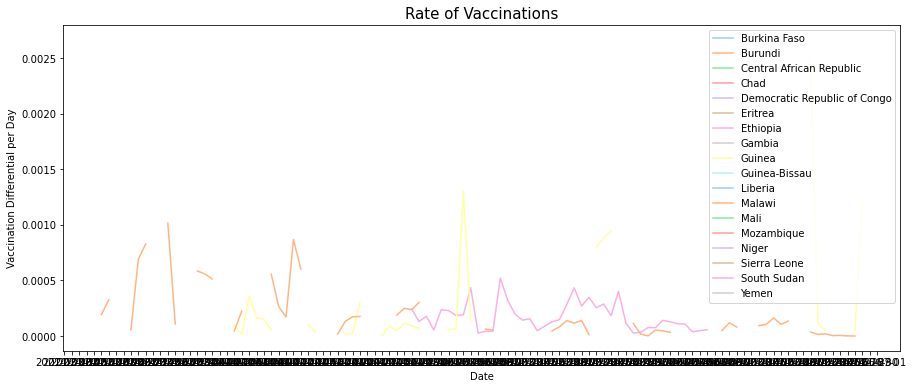

In [52]:
line,ax = mpl.subplots(figsize=(15,6))
ax = sb.lineplot(x="date", y="vaxrate_diff", data=covid[lowhdi], palette="pastel", hue="location")
ax.set_title("Rate of Vaccinations", fontsize=15)
ax.set_xlabel ("Date")
ax.set_ylabel ("Vaccination Differential per Day")
ax.legend (loc="upper right");

<AxesSubplot:xlabel='date', ylabel='vaxrate_diff'>

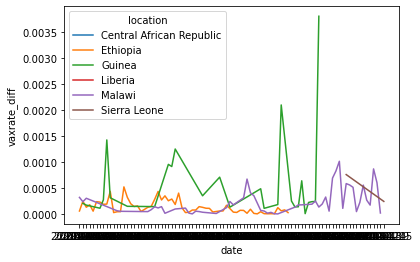

In [31]:
sb.lineplot(data=covid_pivot[lowhdi],x='date',y='vaxrate_diff', hue='location')

ValueError: Unrecognized character a in format string

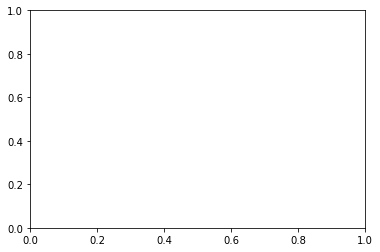

In [37]:
mpl.plot('date','vaxrate_diff')
mpl.title("Vaccination Rate")
mpl.xlabel('date')
mpl.ylabel('vaxrate_diff')
mpl.show()

In [ ]:
covid.isnull().sum()

In [ ]:
deaths = deaths.fillna(0)
deaths.isnull().sum()
sb.heatmap(deaths.isnull(), yticklabels=False)
sb.set(rc={'figure.figsize':(15,11)})

In [ ]:
deaths.columns = ['country_code', 'continent', 'country', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_vaccinations_smoothed_per_million', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index', 'excess_mortality', 'hdi']

In [ ]:
deaths_pivot = pd.pivot_table(deaths, index = ['country','country_code','hdi','population','date'], values = ['new_cases', 'total_cases', 'new_vaccinations', 'total_vaccinations', 'new_deaths', 'total_deaths', 'new_vaccinations', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_cases_per_million', 'total_cases_per_million', 'new_deaths_per_million', 'total_deaths_per_million'])
deaths_pivot

In [ ]:
deaths_pivot.to_csv('deathspivot.csv')